In [1]:
# работа с данными
import pandas as pd
import numpy as np
# визуализация данных
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Банковская гарантия — соглашение, по которому банк обязан выплатить долг клиента, если тот не выполнил своих обязательств. Выдача гарантий банком происходит после одобрения клиентской заявки.

**Задача** — построить аппликационную модель оценки вероятности предъявления по гарантии, чтобы минимизировать потери от кредитного риска. В качестве предикторов для моделирования используются анкетные данные клиента и его финансовые показатели.

In [2]:
# скачиваем данные
!wget https://github.com/dsbattle/hackathon-mkb/raw/master/train_dataset_hackathon_mkb.csv
!wget https://github.com/dsbattle/hackathon-mkb/raw/master/test_dataset_hackathon_mkb.csv

--2021-12-07 09:54:19--  https://github.com/dsbattle/hackathon-mkb/raw/master/train_dataset_hackathon_mkb.csv
Connecting to 192.168.64.142:3128... connected.
Proxy request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dsbattle/hackathon-mkb/master/train_dataset_hackathon_mkb.csv [following]
--2021-12-07 09:54:20--  https://raw.githubusercontent.com/dsbattle/hackathon-mkb/master/train_dataset_hackathon_mkb.csv
Connecting to 192.168.64.142:3128... connected.
Proxy request sent, awaiting response... 200 OK
Length: 9253323 (8.8M) [text/plain]
Saving to: ‘train_dataset_hackathon_mkb.csv’

train_dataset_hacka 100%[===================>]   8.82M  9.67MB/s    in 0.9s    

2021-12-07 09:54:22 (9.67 MB/s) - ‘train_dataset_hackathon_mkb.csv’ saved [9253323/9253323]

--2021-12-07 09:54:22--  https://github.com/dsbattle/hackathon-mkb/raw/master/test_dataset_hackathon_mkb.csv
Connecting to 192.168.64.142:3128... connected.
Proxy request sent, awaiting response... 30

In [3]:
train_df = pd.read_csv('data/train_dataset_hackathon_mkb.csv',  sep=';', encoding='cp1251')
test_df = pd.read_csv('data/test_dataset_hackathon_mkb.csv', sep = ';', encoding='cp1251')

print(f'Размеры тренировочной выборки {train_df.shape}, размеры тестовой выборки {test_df.shape}')

Размеры тренировочной выборки (17891, 124), размеры тестовой выборки (7330, 123)


In [5]:
# кол-во пропущенных значений по каждому столбцу
for n, i in enumerate(train_df.isnull().sum()):
    print(train_df.isnull().sum().index[n] + '  ' + str(i))

id_contract  0
id_client  0
SIGN_DATE  0
IP_flag  0
TARGET  0
F1100  10955
F1110  16471
F1150  11550
F1160  17545
F1170  16392
F1180  15391
F1190  16371
F1200  6041
F1210  8156
F1220  14593
F1230  6407
F1240  15035
F1250  6281
F1260  13529
F1300  6041
F1310  10187
F1320  17794
F1350  16933
F1360  16522
F1370  10396
F1400  13675
F1410  15475
F1420  15603
F1450  17160
F1500  6277
F1510  12633
F1520  6413
F1530  17139
F1550  16990
F1600  6021
F1700  6022
F2100  10341
F2110  6444
F2120  6943
F2200  6386
F2210  13235
F2220  14937
F2300  6361
F2310  17590
F2320  14971
F2330  14388
F2340  10426
F2350  7184
F2400  6381
F2410  8938
F1150_LAG1  12149
F1230_LAG1  8081
F1410_LAG1  16053
F1510_LAG1  13179
F1520_LAG1  8134
F2110_LAG1  8082
F2120_LAG1  8509
F2200_LAG1  8015
F2210_LAG1  13738
F2220_LAG1  15484
F2300_LAG1  7994
F2320_LAG1  15185
F2330_LAG1  14690
F2400_LAG1  7997
EGRPOINCLUDED  3500
DATEFIRSTREG  1334
OKFS_GROUP  3500
OKOPF_GROUP  3500
OKOGU_GROUP  3503
OKATO_REGIONCODE  1332
OKATO_FED

In [6]:
# общее кол-во пустых значений 
train_df.isnull().sum().sum()

1246545

In [7]:
# визуализация данных
train_df.head()

id_contract  id_client           SIGN_DATE  IP_flag  TARGET         F1100  \
0            1       1847  01JAN2018:00:00:00        0       0  1.298961e+09   
1            2       4650  01JAN2018:00:00:00        1       0           NaN   
2            3       4770  01JAN2018:00:00:00        0       0  7.337400e+07   
3            4      12237  01JAN2018:00:00:00        0       0  1.937488e+09   
4            5       9988  01JAN2018:00:00:00        1       0           NaN   

         F1110         F1150  F1160        F1170  ...  WINNERNUMBER_95_EVER  \
0    2154000.0  1.125573e+09    NaN  150010000.0  ...                   NaN   
1          NaN           NaN    NaN          NaN  ...                   NaN   
2          NaN  7.337400e+07    NaN          NaN  ...                 169.0   
3  122828000.0  6.103280e+08    NaN  809426000.0  ...                   NaN   
4          NaN           NaN    NaN          NaN  ...                   NaN   

   SIGNEDNUMBER_95_EVER  SUM_95_EVER  FLAG_DISQUALIFICATION  \
0                   NaN          NaN                    NaN   
1                   NaN          NaN                    NaN   
2                 168.0   18351739.0                    NaN   
3                   NaN          NaN                    NaN   
4                   NaN          NaN                    NaN   

   COUNT_CHANGE_YEAR  COUNT_CHANGE_EVER  BIRTHDATE  AGE  SEX_NAME  \
0                NaN                NaN        NaN  NaN       NaN   
1                NaN                NaN        NaN  NaN       NaN   
2                NaN                1.0        NaN  NaN       NaN   
3                NaN                NaN        NaN  NaN       NaN   
4                NaN                NaN        NaN  NaN       NaN   

   CITIZENSHIP_NAME  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN  

[5 rows x 124 columns]

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17891 entries, 0 to 17890
Columns: 124 entries, id_contract to CITIZENSHIP_NAME
dtypes: float64(108), int64(4), object(12)
memory usage: 16.9+ MB


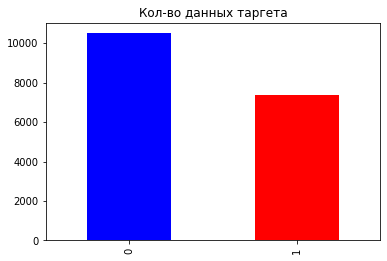

In [9]:
# визуализация таргета
train_df['TARGET'].value_counts().plot(kind = 'bar', color = ['blue', 'red'])
plt.title('Кол-во данных таргета');

### Обработка и генерация новых признаков

In [10]:
# забираем с даты только год
import re

def data_convert(data):
    return 0 if pd.isna(data) else int(re.findall('\d{4}', data)[0])
    
for item in ['DATEFIRSTREG', 'TAXREG_REGDATE', 'TAXREGPAY_REGDATE', 'SIGN_DATE']:
    train_df[item + 'all_year'] = train_df[item].apply(data_convert)
    
for item in ['DATEFIRSTREG', 'SIGN_DATE', 'TAXREGPAY_REGDATE', 'TAXREG_REGDATE']:
    test_df[item + 'all_year'] = test_df[item].apply(data_convert)

In [11]:
# Заменяем "Регистрация в налоговом органе. Дата регистрации" в 1960 году на дату регистрации ФНС.
# Выглядит более логично
train_df['TAXREGPAY_REGDATE' + 'all_year'] = train_df[['TAXREGPAY_REGDATEall_year', 'TAXREG_REGDATEall_year']].apply(lambda x: x[1] \
                                                                              if int(x[1]) > 1960 else x[0], axis=1)
test_df['TAXREGPAY_REGDATE' + 'all_year'] = test_df[['TAXREGPAY_REGDATEall_year', 'TAXREG_REGDATEall_year']].apply(lambda x: x[1] \
                                                                              if x[1] > 1960 else x[0], axis=1)

In [12]:
def makeX(data):
    # предобработка данных
    data['CITIZENSHIP_NAME'] = data['CITIZENSHIP_NAME'].fillna(-1).map({-1: -1, 'Российская Федерация': 4, 'Таджикистан': 3, 'Казахстан': 2, 'Армения': 1})
    data['SEX_NAME'] = data['SEX_NAME'].fillna(0).map({0: 0, 'мужской': 1, 'женский': -1})
    group_names = ['OKFS_GROUP', 'OKOPF_GROUP', 'OKOGU_GROUP'] + ['OKVED_CODE']
    date_names = ['SIGN_DATE', 'DATEFIRSTREG', 'TAXREG_REGDATE', 'TAXREGPAY_REGDATE', 'BIRTHDATE']
    for name in group_names + date_names + ['id_client']:
        data[name] = data[name].fillna(-1)
        tmp = data[name].value_counts()
        tmp = tmp + 0.1 * np.random.randn(len(tmp))
        data[name] = data[name].map(tmp)
    return data

In [13]:
train = makeX(train_df) # обрабатываем обучение
test = makeX(test_df) # обрабатываем тест

In [14]:
# сохраняем ид_клиента для записи
id_client = pd.DataFrame()
id_client['id_contract'] = test['id_contract']
id_client.head()

id_contract
0        17892
1        17893
2        17894
3        17895
4        17896

In [15]:
# Замена строки на числа
for col in ['OKFS_GROUP', 'OKOPF_GROUP', 'OKOGU_GROUP', 'OKVED_CODE']:
    train[col] = train[col].astype('category')
    train[col] = train[col].cat.codes
    test[col] = test[col].astype('category')
    test[col] = test[col].cat.codes

In [16]:
# Замена нулевых значений на более полулярные 
def _list_max_key(mass, dataset):
    result = {}
    for item in mass:
        result[item] = {np.nan:pd.crosstab(dataset[item], 1).sort_values(by = 1)[::-1].index[0]}
    return result
a = ['COUNTCOOWNERFCSM', 'COUNTCOOWNERROSSTAT', 'COUNTCOOWNEREGRUL', 'COUNTBRANCH',
     'COUNTBRANCHROSSTAT', 'COUNTBRANCHEGRUL', 'OKATO_REGIONCODE', 'OKATO_FED', 'OKTMO_FED',
     'OKFS_GROUP', 'OKOPF_GROUP', 'OKOGU_GROUP', 'IP_flag']
dick_train = _list_max_key(a ,train)
dick_test = _list_max_key(a, test)

train = train.replace(dick_train)
test = test.replace(dick_test)

In [17]:
# численность персонала, приводим к числу
# def convert_worker(data):
#     return max([int(i) for i in data.split(' ') if i.isdigit()], default = 1)


# train['WORKERSRANGE'] = train['WORKERSRANGE'].astype('str')
# train['WORKERSRANGE'] = train['WORKERSRANGE'].apply(convert_worker)

# test['WORKERSRANGE'] = test['WORKERSRANGE'].astype('str')
# test['WORKERSRANGE'] = test['WORKERSRANGE'].apply(convert_worker)

str2num = {'5000 и более': 12, '1001 .. 5000': 11, '501 .. 1000': 10, '251 .. 500': 9, '201 .. 250': 8, '151 .. 200': 7,
             '101 .. 150': 6, '51 .. 100': 5, '16 .. 50': 4, '11 .. 15': 3, '6 .. 10': 2, '0 .. 5': 1}
train['WORKERSRANGE'] = train['WORKERSRANGE'].map(str2num).astype(float)
test['WORKERSRANGE'] = test['WORKERSRANGE'].map(str2num).astype(float)

/home/andrey/Neural/neuralenv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


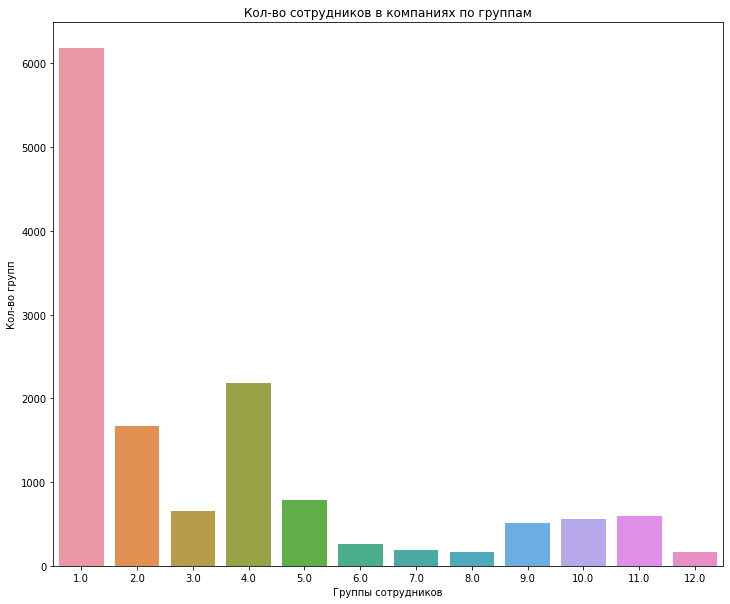

In [18]:
_ = pd.crosstab(train['WORKERSRANGE'], 1)
fig, ax = plt.subplots(figsize = (12, 10))
sns.barplot(list(_.index), list(_[1].values))
ax.set_title('Кол-во сотрудников в компаниях по группам')
ax.set_xlabel('Группы сотрудников')
ax.set_ylabel('Кол-во групп');

In [19]:
def money(data):    
    data['debt'] = (data['F1410']+data['F1510'])
    data['debt_on_profit'] = (data['F1410']+data['F1510'])/data['F2110']
    data['debt_on_profit_LAG1'] = (data['F1410_LAG1']+data['F1510_LAG1'])/data['F2110_LAG1']
    data['debt_on_profit_diff']  = data['debt_on_profit'] - data['debt_on_profit_LAG1']
    data['debt_on_profit_diff_ratio']  = (data['debt_on_profit'] - data['debt_on_profit_LAG1'])/data['debt_on_profit']
    
    lags = [ 'F1150_LAG1', 'F1230_LAG1', 'F1410_LAG1', 'F1510_LAG1', 'F1520_LAG1', 'F2110_LAG1', 'F2120_LAG1', 
         'F2200_LAG1', 'F2210_LAG1', 'F2220_LAG1', 'F2300_LAG1', 'F2320_LAG1', 'F2330_LAG1', 'F2400_LAG1']

    for lag in lags:
        col = lag.split('_')[0]
        data[col + '_delta_ratio'] = (data[col] - data[lag])/data[col]

    
    data['fit_on_all']=data['F2200']/data['F2110']
    data['in'] = data['F1300'] + data['F2120'] + data['F2110'] + data['F1210'] + data['F2300']
    data['out'] = data['F1250'] + data['F1230'] + data['F1520'] + data['F1510'] + data['F2410']
    data['waste'] = data['F2350'] + data['F2210']
    data['in_on_out'] = data['in']/data['out']
    data['in_on_waste'] = data['in']/data['waste']
    data['in_on_waste_out'] = data['in']/(data['waste'] + data['out'])
    
    data['F_contract_count'] = data[['id_client','id_contract']].groupby('id_client', as_index=False).transform('count')
    data['F_contract_count_in_day'] = data.groupby(['id_client','SIGN_DATE'])['SIGN_DATE'].transform('count')   
    
    return data

train = money(train)
test = money(test)

In [20]:
# замена пустых значений на 0
train.fillna(0, inplace=True)
test.fillna(0, inplace = True)

In [21]:
# кол-во пустых значений
train.isnull().sum().sum(), test.isnull().sum().sum()

(0, 0)

<Figure size 1440x864 with 0 Axes>

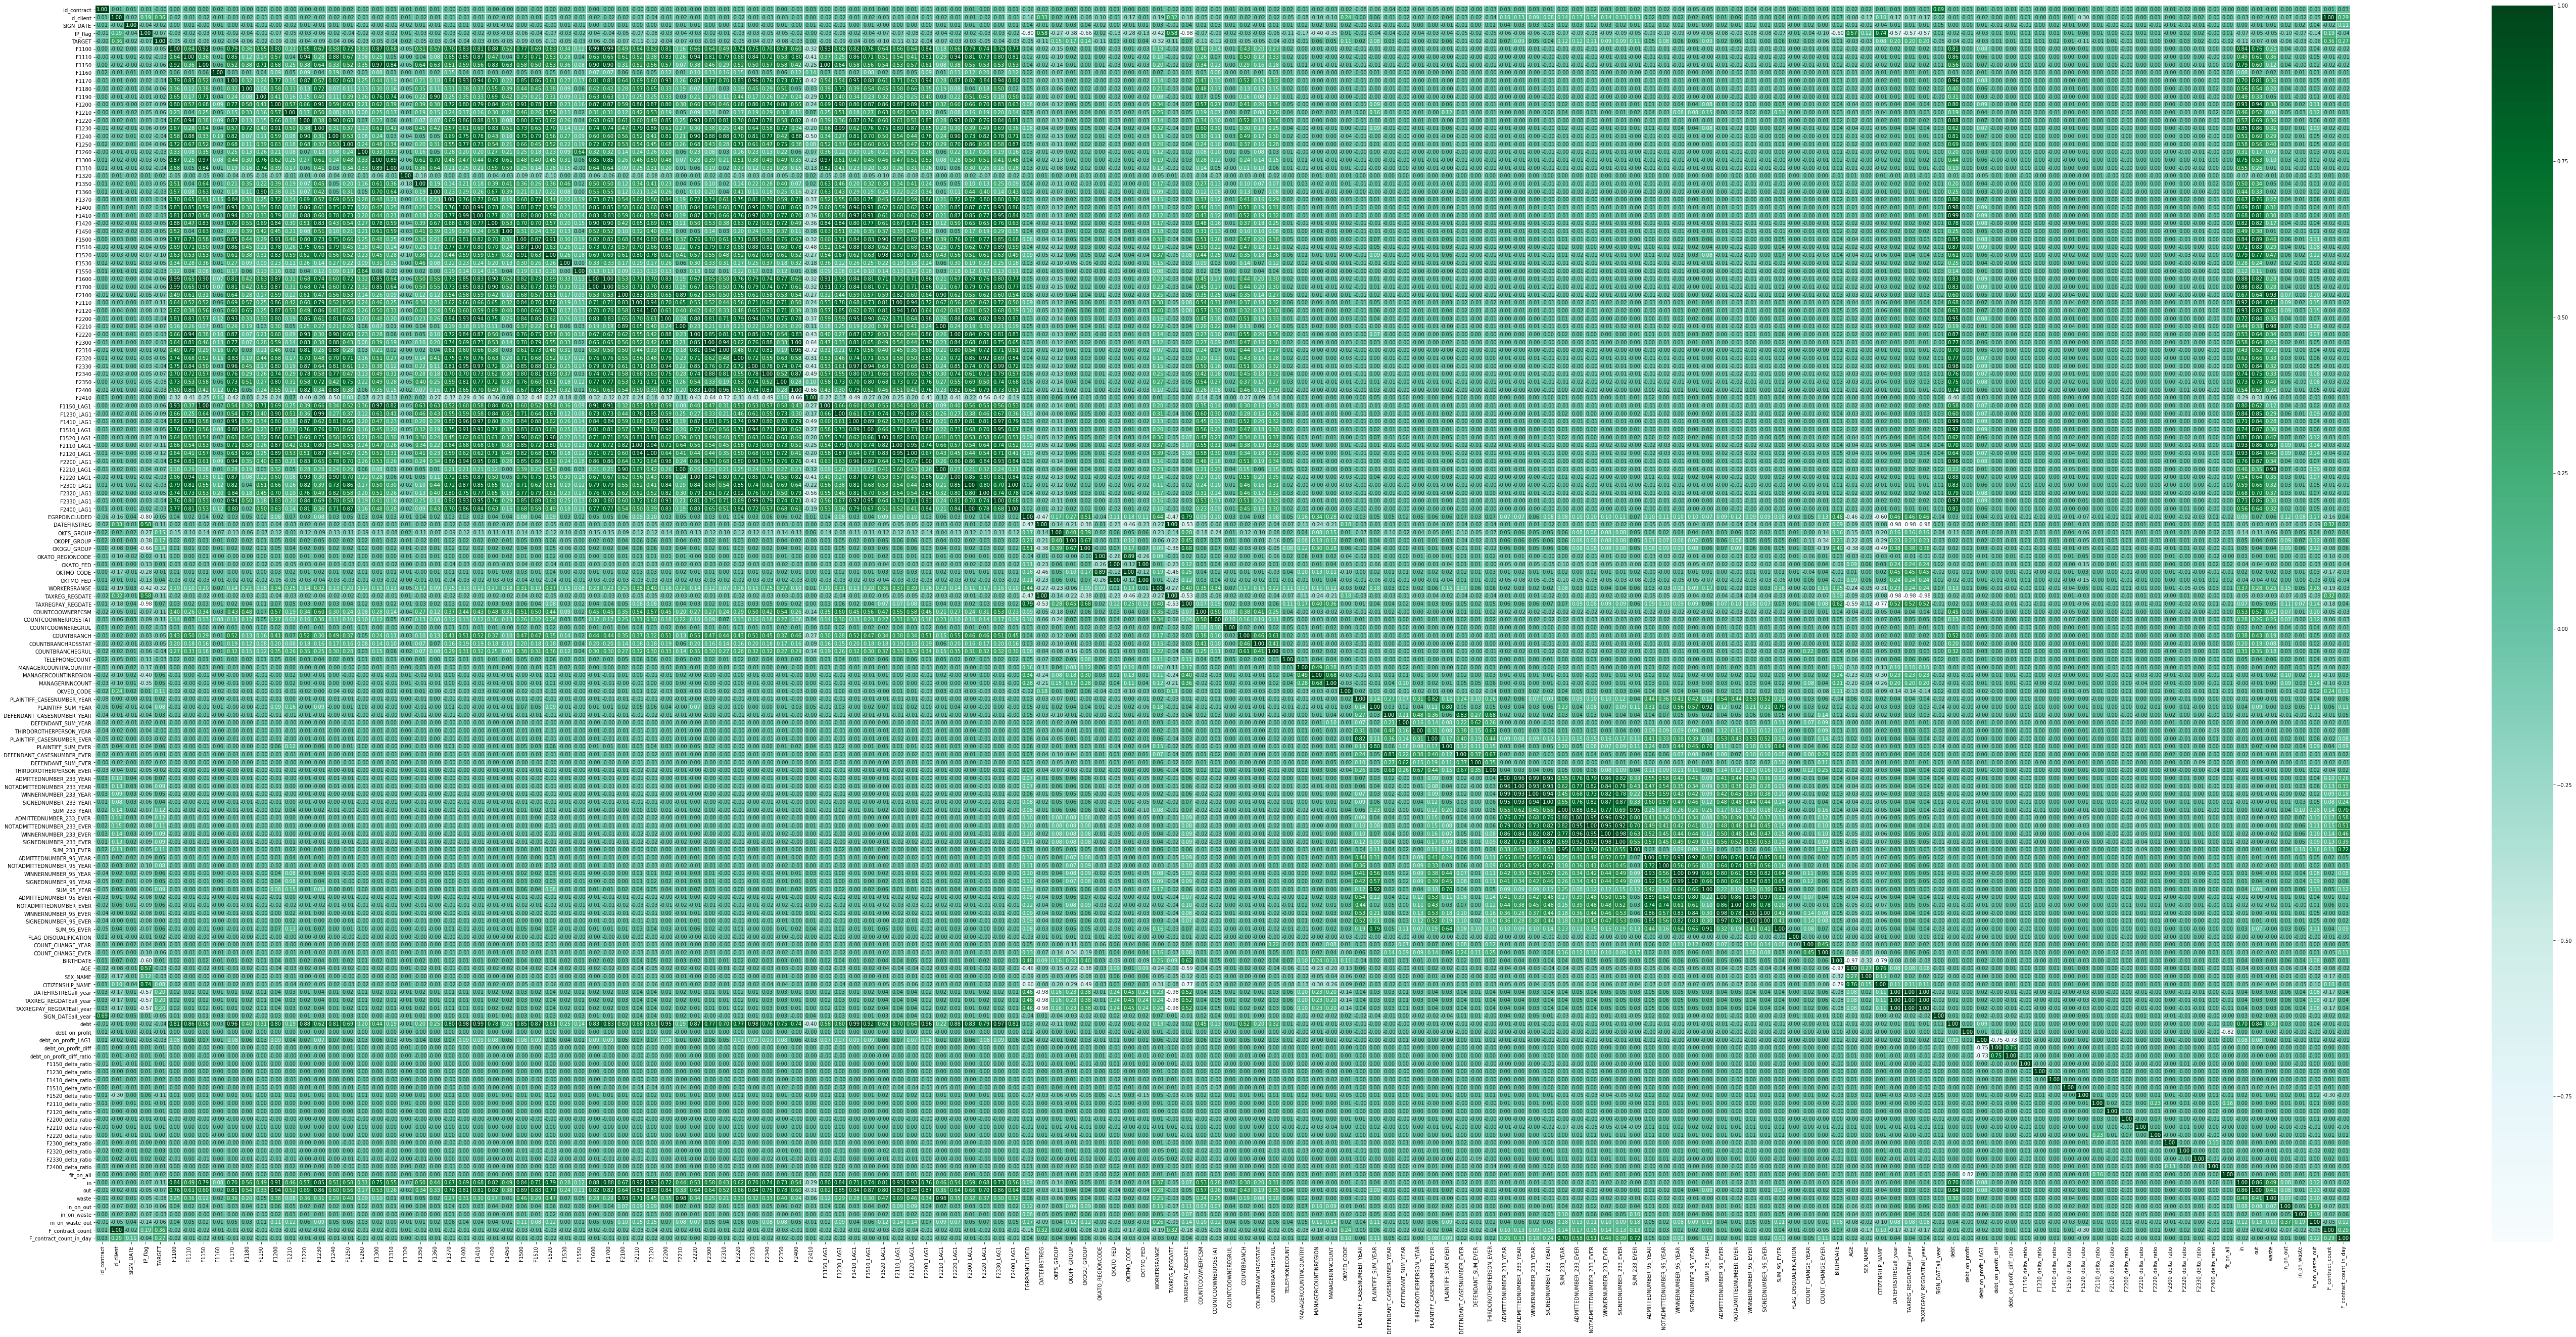

<Figure size 1440x864 with 0 Axes>

In [22]:
corr_matrix = train.corr()
fig, ax = plt.subplots(figsize = (100, 45))
ax = sns.heatmap(corr_matrix,
                 annot = True,
                 linewidths=0.5,
                 fmt = '.2f',
                 cmap = 'BuGn'            
                );
plt.figure(figsize = (20, 12))

### Тренировка моделей Catboosting

In [23]:
from sklearn.model_selection import (GridSearchCV,
                                     train_test_split,
                                     StratifiedKFold)

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, \
                             RandomForestRegressor, AdaBoostClassifier
from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, \
                            precision_score, f1_score, classification_report, plot_roc_curve
from sklearn.metrics import roc_curve,confusion_matrix

from xgboost import XGBClassifier

In [24]:
# тут мы делим данные на тренировку и валидацию 80 на 20. Нужно для проверки модели
np.random.seed(42)

X = train.drop('TARGET', axis = 1)
y = train['TARGET']

df_X_train, df_X_test, df_y_train, df_y_test = train_test_split(X, y, test_size=0.2, random_state=42)
df_X_train.shape, df_y_train.shape

((14312, 155), (14312,))

Learning rate set to 0.032094
0:	learn: 0.6654399	total: 60.1ms	remaining: 1m
1:	learn: 0.6389381	total: 79.4ms	remaining: 39.6s
2:	learn: 0.6100022	total: 90.7ms	remaining: 30.1s
3:	learn: 0.5842071	total: 102ms	remaining: 25.3s
4:	learn: 0.5665242	total: 112ms	remaining: 22.3s
5:	learn: 0.5497336	total: 122ms	remaining: 20.2s
6:	learn: 0.5326106	total: 132ms	remaining: 18.7s
7:	learn: 0.5148150	total: 143ms	remaining: 17.7s
8:	learn: 0.4985971	total: 154ms	remaining: 17s
9:	learn: 0.4854375	total: 164ms	remaining: 16.3s
10:	learn: 0.4698322	total: 175ms	remaining: 15.7s
11:	learn: 0.4595824	total: 184ms	remaining: 15.2s
12:	learn: 0.4490547	total: 194ms	remaining: 14.8s
13:	learn: 0.4382363	total: 207ms	remaining: 14.6s
14:	learn: 0.4287721	total: 222ms	remaining: 14.6s
15:	learn: 0.4205570	total: 233ms	remaining: 14.3s
16:	learn: 0.4135826	total: 244ms	remaining: 14.1s
17:	learn: 0.4042531	total: 254ms	remaining: 13.9s
18:	learn: 0.3982829	total: 267ms	remaining: 13.8s
19:	learn: 0.

172:	learn: 0.2418664	total: 2.07s	remaining: 9.91s
173:	learn: 0.2416750	total: 2.08s	remaining: 9.88s
174:	learn: 0.2414108	total: 2.09s	remaining: 9.87s
175:	learn: 0.2407422	total: 2.1s	remaining: 9.86s
176:	learn: 0.2405110	total: 2.12s	remaining: 9.84s
177:	learn: 0.2402477	total: 2.13s	remaining: 9.81s
178:	learn: 0.2400049	total: 2.13s	remaining: 9.79s
179:	learn: 0.2397134	total: 2.15s	remaining: 9.77s
180:	learn: 0.2394744	total: 2.16s	remaining: 9.77s
181:	learn: 0.2391038	total: 2.17s	remaining: 9.75s
182:	learn: 0.2389198	total: 2.18s	remaining: 9.73s
183:	learn: 0.2386928	total: 2.2s	remaining: 9.75s
184:	learn: 0.2384563	total: 2.21s	remaining: 9.75s
185:	learn: 0.2382320	total: 2.23s	remaining: 9.77s
186:	learn: 0.2380391	total: 2.25s	remaining: 9.79s
187:	learn: 0.2378841	total: 2.27s	remaining: 9.81s
188:	learn: 0.2376335	total: 2.29s	remaining: 9.83s
189:	learn: 0.2374809	total: 2.3s	remaining: 9.82s
190:	learn: 0.2372666	total: 2.32s	remaining: 9.85s
191:	learn: 0.2

332:	learn: 0.2122816	total: 3.99s	remaining: 7.99s
333:	learn: 0.2122257	total: 4s	remaining: 7.97s
334:	learn: 0.2120272	total: 4s	remaining: 7.95s
335:	learn: 0.2118255	total: 4.01s	remaining: 7.93s
336:	learn: 0.2115312	total: 4.03s	remaining: 7.92s
337:	learn: 0.2114039	total: 4.04s	remaining: 7.91s
338:	learn: 0.2112358	total: 4.05s	remaining: 7.89s
339:	learn: 0.2110668	total: 4.06s	remaining: 7.88s
340:	learn: 0.2108720	total: 4.07s	remaining: 7.86s
341:	learn: 0.2108286	total: 4.08s	remaining: 7.85s
342:	learn: 0.2105090	total: 4.09s	remaining: 7.83s
343:	learn: 0.2103906	total: 4.1s	remaining: 7.81s
344:	learn: 0.2103081	total: 4.11s	remaining: 7.8s
345:	learn: 0.2101760	total: 4.12s	remaining: 7.79s
346:	learn: 0.2100351	total: 4.14s	remaining: 7.78s
347:	learn: 0.2099391	total: 4.15s	remaining: 7.77s
348:	learn: 0.2096537	total: 4.16s	remaining: 7.75s
349:	learn: 0.2093739	total: 4.18s	remaining: 7.77s
350:	learn: 0.2093085	total: 4.2s	remaining: 7.76s
351:	learn: 0.2091221

496:	learn: 0.1889478	total: 6.06s	remaining: 6.14s
497:	learn: 0.1888151	total: 6.08s	remaining: 6.13s
498:	learn: 0.1886897	total: 6.09s	remaining: 6.12s
499:	learn: 0.1885790	total: 6.11s	remaining: 6.11s
500:	learn: 0.1885021	total: 6.12s	remaining: 6.09s
501:	learn: 0.1883210	total: 6.13s	remaining: 6.08s
502:	learn: 0.1881731	total: 6.14s	remaining: 6.06s
503:	learn: 0.1881061	total: 6.15s	remaining: 6.05s
504:	learn: 0.1880862	total: 6.16s	remaining: 6.03s
505:	learn: 0.1879082	total: 6.17s	remaining: 6.02s
506:	learn: 0.1878149	total: 6.18s	remaining: 6.01s
507:	learn: 0.1877078	total: 6.19s	remaining: 6s
508:	learn: 0.1876087	total: 6.2s	remaining: 5.98s
509:	learn: 0.1874497	total: 6.21s	remaining: 5.97s
510:	learn: 0.1873518	total: 6.22s	remaining: 5.95s
511:	learn: 0.1871818	total: 6.23s	remaining: 5.94s
512:	learn: 0.1870575	total: 6.24s	remaining: 5.93s
513:	learn: 0.1868854	total: 6.25s	remaining: 5.91s
514:	learn: 0.1867361	total: 6.27s	remaining: 5.9s
515:	learn: 0.186

662:	learn: 0.1705616	total: 7.94s	remaining: 4.04s
663:	learn: 0.1704761	total: 7.95s	remaining: 4.02s
664:	learn: 0.1703922	total: 7.96s	remaining: 4.01s
665:	learn: 0.1702132	total: 7.97s	remaining: 4s
666:	learn: 0.1701379	total: 7.98s	remaining: 3.98s
667:	learn: 0.1700498	total: 7.99s	remaining: 3.97s
668:	learn: 0.1699452	total: 8s	remaining: 3.96s
669:	learn: 0.1698223	total: 8.01s	remaining: 3.95s
670:	learn: 0.1696695	total: 8.02s	remaining: 3.93s
671:	learn: 0.1695520	total: 8.04s	remaining: 3.92s
672:	learn: 0.1694579	total: 8.04s	remaining: 3.91s
673:	learn: 0.1693439	total: 8.05s	remaining: 3.9s
674:	learn: 0.1692863	total: 8.07s	remaining: 3.88s
675:	learn: 0.1691428	total: 8.08s	remaining: 3.87s
676:	learn: 0.1690220	total: 8.09s	remaining: 3.86s
677:	learn: 0.1689554	total: 8.1s	remaining: 3.85s
678:	learn: 0.1688524	total: 8.11s	remaining: 3.83s
679:	learn: 0.1688005	total: 8.12s	remaining: 3.82s
680:	learn: 0.1687333	total: 8.13s	remaining: 3.81s
681:	learn: 0.168569

831:	learn: 0.1547941	total: 10s	remaining: 2.02s
832:	learn: 0.1547148	total: 10s	remaining: 2.01s
833:	learn: 0.1546173	total: 10s	remaining: 2s
834:	learn: 0.1545689	total: 10s	remaining: 1.98s
835:	learn: 0.1544687	total: 10.1s	remaining: 1.97s
836:	learn: 0.1544291	total: 10.1s	remaining: 1.96s
837:	learn: 0.1543629	total: 10.1s	remaining: 1.95s
838:	learn: 0.1543329	total: 10.1s	remaining: 1.94s
839:	learn: 0.1542345	total: 10.1s	remaining: 1.93s
840:	learn: 0.1541678	total: 10.1s	remaining: 1.92s
841:	learn: 0.1540500	total: 10.2s	remaining: 1.91s
842:	learn: 0.1539339	total: 10.2s	remaining: 1.9s
843:	learn: 0.1538489	total: 10.2s	remaining: 1.89s
844:	learn: 0.1537981	total: 10.2s	remaining: 1.87s
845:	learn: 0.1536676	total: 10.2s	remaining: 1.86s
846:	learn: 0.1535822	total: 10.2s	remaining: 1.85s
847:	learn: 0.1534989	total: 10.2s	remaining: 1.84s
848:	learn: 0.1534147	total: 10.3s	remaining: 1.82s
849:	learn: 0.1532946	total: 10.3s	remaining: 1.81s
850:	learn: 0.1532400	to

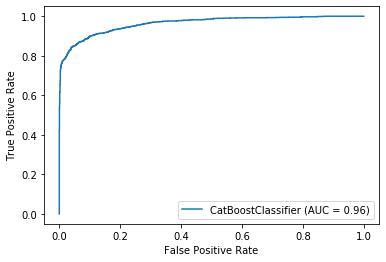

In [25]:
# тренировка модели
model = CatBoostClassifier().fit(df_X_train, df_y_train)
plot_roc_curve(model, df_X_test, df_y_test)

In [26]:
kek_pred = model.predict(df_X_test)
print("Roc_auc_score = " + str(roc_auc_score(df_y_test, kek_pred)))

Roc_auc_score = 0.8997710903099757


In [27]:
# тренировка лучших моделей 
np.random.seed(42)
model = CatBoostClassifier().fit(X, y)
test['TARGET'] = np.log(model.predict_proba(test)[:, 1])

test[['id_contract', 'TARGET']].to_csv('submit_file_last.csv', sep=';', index=False)
test[['id_contract', 'TARGET']].head()
test = test.drop('TARGET', axis = 1)

Learning rate set to 0.035303
0:	learn: 0.6601621	total: 18.1ms	remaining: 18.1s
1:	learn: 0.6317786	total: 31.6ms	remaining: 15.8s
2:	learn: 0.6006531	total: 42.1ms	remaining: 14s
3:	learn: 0.5747227	total: 52.8ms	remaining: 13.1s
4:	learn: 0.5551567	total: 65.3ms	remaining: 13s
5:	learn: 0.5347633	total: 75.4ms	remaining: 12.5s
6:	learn: 0.5182496	total: 88.5ms	remaining: 12.6s
7:	learn: 0.5002880	total: 100ms	remaining: 12.4s
8:	learn: 0.4836181	total: 113ms	remaining: 12.4s
9:	learn: 0.4677838	total: 124ms	remaining: 12.3s
10:	learn: 0.4541896	total: 134ms	remaining: 12.1s
11:	learn: 0.4440909	total: 146ms	remaining: 12.1s
12:	learn: 0.4339532	total: 157ms	remaining: 11.9s
13:	learn: 0.4234722	total: 168ms	remaining: 11.8s
14:	learn: 0.4149635	total: 180ms	remaining: 11.8s
15:	learn: 0.4077328	total: 193ms	remaining: 11.9s
16:	learn: 0.4004601	total: 209ms	remaining: 12.1s
17:	learn: 0.3909289	total: 222ms	remaining: 12.1s
18:	learn: 0.3845880	total: 232ms	remaining: 12s
19:	learn:

169:	learn: 0.2384212	total: 2.09s	remaining: 10.2s
170:	learn: 0.2382185	total: 2.1s	remaining: 10.2s
171:	learn: 0.2379952	total: 2.11s	remaining: 10.2s
172:	learn: 0.2376661	total: 2.12s	remaining: 10.2s
173:	learn: 0.2375356	total: 2.13s	remaining: 10.1s
174:	learn: 0.2373504	total: 2.15s	remaining: 10.1s
175:	learn: 0.2372123	total: 2.16s	remaining: 10.1s
176:	learn: 0.2370467	total: 2.17s	remaining: 10.1s
177:	learn: 0.2367940	total: 2.18s	remaining: 10.1s
178:	learn: 0.2365658	total: 2.19s	remaining: 10.1s
179:	learn: 0.2364006	total: 2.21s	remaining: 10.1s
180:	learn: 0.2362620	total: 2.22s	remaining: 10s
181:	learn: 0.2359745	total: 2.23s	remaining: 10s
182:	learn: 0.2357345	total: 2.25s	remaining: 10s
183:	learn: 0.2355245	total: 2.26s	remaining: 10s
184:	learn: 0.2353954	total: 2.27s	remaining: 9.99s
185:	learn: 0.2351769	total: 2.31s	remaining: 10.1s
186:	learn: 0.2350424	total: 2.34s	remaining: 10.2s
187:	learn: 0.2348721	total: 2.35s	remaining: 10.2s
188:	learn: 0.2344656

338:	learn: 0.2089047	total: 4.15s	remaining: 8.1s
339:	learn: 0.2087312	total: 4.17s	remaining: 8.09s
340:	learn: 0.2085824	total: 4.18s	remaining: 8.07s
341:	learn: 0.2085556	total: 4.19s	remaining: 8.06s
342:	learn: 0.2083440	total: 4.2s	remaining: 8.05s
343:	learn: 0.2082390	total: 4.21s	remaining: 8.03s
344:	learn: 0.2080406	total: 4.22s	remaining: 8.02s
345:	learn: 0.2078185	total: 4.23s	remaining: 8s
346:	learn: 0.2076597	total: 4.24s	remaining: 7.99s
347:	learn: 0.2075634	total: 4.25s	remaining: 7.97s
348:	learn: 0.2074279	total: 4.26s	remaining: 7.95s
349:	learn: 0.2072796	total: 4.27s	remaining: 7.94s
350:	learn: 0.2071344	total: 4.28s	remaining: 7.92s
351:	learn: 0.2069187	total: 4.29s	remaining: 7.91s
352:	learn: 0.2068091	total: 4.3s	remaining: 7.89s
353:	learn: 0.2067084	total: 4.32s	remaining: 7.88s
354:	learn: 0.2065422	total: 4.33s	remaining: 7.86s
355:	learn: 0.2064025	total: 4.34s	remaining: 7.85s
356:	learn: 0.2062829	total: 4.35s	remaining: 7.84s
357:	learn: 0.2061

508:	learn: 0.1866733	total: 6.01s	remaining: 5.8s
509:	learn: 0.1866426	total: 6.02s	remaining: 5.79s
510:	learn: 0.1865566	total: 6.04s	remaining: 5.78s
511:	learn: 0.1864771	total: 6.05s	remaining: 5.76s
512:	learn: 0.1863393	total: 6.05s	remaining: 5.75s
513:	learn: 0.1862089	total: 6.07s	remaining: 5.74s
514:	learn: 0.1860873	total: 6.08s	remaining: 5.72s
515:	learn: 0.1860060	total: 6.08s	remaining: 5.71s
516:	learn: 0.1858751	total: 6.1s	remaining: 5.7s
517:	learn: 0.1856749	total: 6.11s	remaining: 5.68s
518:	learn: 0.1856030	total: 6.12s	remaining: 5.67s
519:	learn: 0.1854319	total: 6.13s	remaining: 5.66s
520:	learn: 0.1853730	total: 6.14s	remaining: 5.64s
521:	learn: 0.1853015	total: 6.15s	remaining: 5.63s
522:	learn: 0.1852066	total: 6.16s	remaining: 5.62s
523:	learn: 0.1850179	total: 6.17s	remaining: 5.61s
524:	learn: 0.1849159	total: 6.18s	remaining: 5.59s
525:	learn: 0.1848448	total: 6.2s	remaining: 5.58s
526:	learn: 0.1847838	total: 6.21s	remaining: 5.57s
527:	learn: 0.18

673:	learn: 0.1694322	total: 8.08s	remaining: 3.91s
674:	learn: 0.1693492	total: 8.09s	remaining: 3.9s
675:	learn: 0.1692757	total: 8.1s	remaining: 3.88s
676:	learn: 0.1691429	total: 8.11s	remaining: 3.87s
677:	learn: 0.1690004	total: 8.13s	remaining: 3.86s
678:	learn: 0.1689846	total: 8.14s	remaining: 3.85s
679:	learn: 0.1688398	total: 8.15s	remaining: 3.83s
680:	learn: 0.1687747	total: 8.16s	remaining: 3.82s
681:	learn: 0.1686597	total: 8.18s	remaining: 3.81s
682:	learn: 0.1685508	total: 8.19s	remaining: 3.8s
683:	learn: 0.1684821	total: 8.21s	remaining: 3.79s
684:	learn: 0.1683857	total: 8.22s	remaining: 3.78s
685:	learn: 0.1683807	total: 8.23s	remaining: 3.77s
686:	learn: 0.1682551	total: 8.24s	remaining: 3.76s
687:	learn: 0.1681654	total: 8.26s	remaining: 3.75s
688:	learn: 0.1680546	total: 8.27s	remaining: 3.73s
689:	learn: 0.1679746	total: 8.28s	remaining: 3.72s
690:	learn: 0.1678139	total: 8.29s	remaining: 3.71s
691:	learn: 0.1677047	total: 8.31s	remaining: 3.7s
692:	learn: 0.16

846:	learn: 0.1549794	total: 10.1s	remaining: 1.83s
847:	learn: 0.1549682	total: 10.1s	remaining: 1.82s
848:	learn: 0.1548784	total: 10.1s	remaining: 1.8s
849:	learn: 0.1547512	total: 10.2s	remaining: 1.79s
850:	learn: 0.1546694	total: 10.2s	remaining: 1.78s
851:	learn: 0.1545895	total: 10.2s	remaining: 1.77s
852:	learn: 0.1545029	total: 10.2s	remaining: 1.76s
853:	learn: 0.1544059	total: 10.2s	remaining: 1.75s
854:	learn: 0.1543573	total: 10.2s	remaining: 1.73s
855:	learn: 0.1542433	total: 10.2s	remaining: 1.72s
856:	learn: 0.1541970	total: 10.2s	remaining: 1.71s
857:	learn: 0.1541113	total: 10.3s	remaining: 1.7s
858:	learn: 0.1540173	total: 10.3s	remaining: 1.69s
859:	learn: 0.1539566	total: 10.3s	remaining: 1.67s
860:	learn: 0.1539030	total: 10.3s	remaining: 1.66s
861:	learn: 0.1538135	total: 10.3s	remaining: 1.65s
862:	learn: 0.1537319	total: 10.3s	remaining: 1.64s
863:	learn: 0.1536289	total: 10.3s	remaining: 1.63s
864:	learn: 0.1535579	total: 10.3s	remaining: 1.61s
865:	learn: 0.